In [20]:
from typing import List
import pandas as pd
import seaborn as sns
from pathlib import Path
from utils import dump_dref

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1)
sns.set_palette("colorblind")

# dry = "size_counters/220701-152907"
bench = Path("size_counters/latest")

# in minutes
times = [60, 120, 180]
points = list(range(3))


def diff(a: pd.DataFrame, b: pd.DataFrame) -> pd.DataFrame:
    out = b.copy()
    out[out.columns[2:]] -= a[a.columns[2:]]
    return out


def total(d: pd.DataFrame) -> pd.DataFrame:
    return d.loc[:, d.columns != "CPU"].groupby(["op"]).sum()


def load(t: int, p: int) -> pd.DataFrame:
    df = pd.read_csv(bench / f"t{t}" / f"t{p}.csv")
    df.loc[df["op"] == "a", "op"] = "Kernel"
    df.loc[df["op"] == "u", "op"] = "User"
    df.drop(df[df["op"] == "f"].index, inplace=True)
    return df


benches = [[load(t, p) for p in points] for t in times]


def save_dref(name: str, groupby: List[str], data: pd.DataFrame):
    out = {}
    data = data.dropna(axis=0).groupby(groupby).mean(numeric_only=True)
    for index, row in data.iterrows():
        out["/".join(map(str, row.name))] = row.values[0]
    with Path(f"out/{name}.dref").open("w+") as f:
        dump_dref(f, name, out)


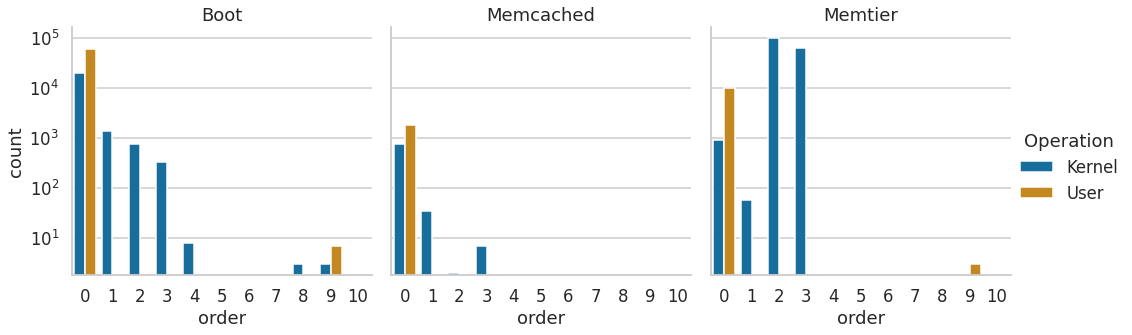

In [25]:
# Allocation / Free Counts for memtier 60s
p = benches[0]
b0 = p[0].copy()
b0["p"] = "Boot"
b1 = diff(p[0], p[1])
b1["p"] = "Memcached"
b2 = diff(p[1], p[2])
b2["p"] = "Memtier"

df = pd.concat([b0, b1, b2])
df["count"] += df["bulk"]

plt = sns.catplot(data=df, kind="bar", x="order", y="count", hue="op", col="p")
plt.set(yscale="log")
plt.set_titles("{col_name}")
plt.legend.set_title("Operation")

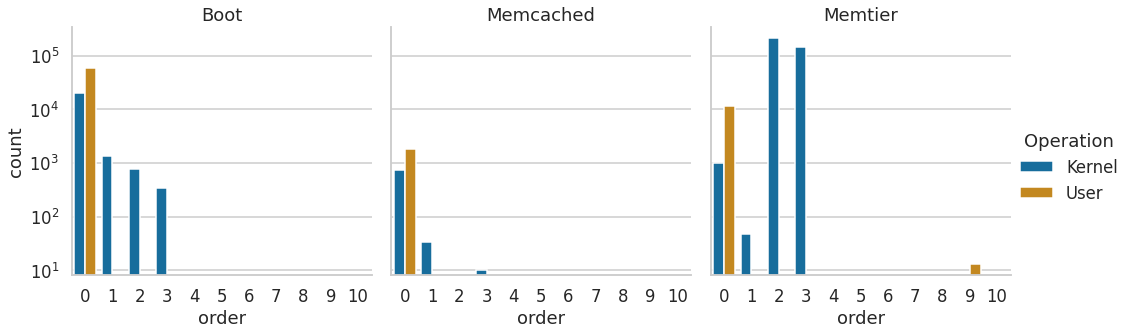

In [26]:
# Allocation / Free Counts for memtier 120s
p = benches[1]
b0 = p[0].copy()
b0["p"] = "Boot"
b1 = diff(p[0], p[1])
b1["p"] = "Memcached"
b2 = diff(p[1], p[2])
b2["p"] = "Memtier"

df = pd.concat([b0, b1, b2])
df["count"] += df["bulk"]

plt = sns.catplot(data=df, kind="bar", x="order", y="count", hue="op", col="p")
plt.set(yscale="log")
plt.set_titles("{col_name}")
plt.legend.set_title("Operation")


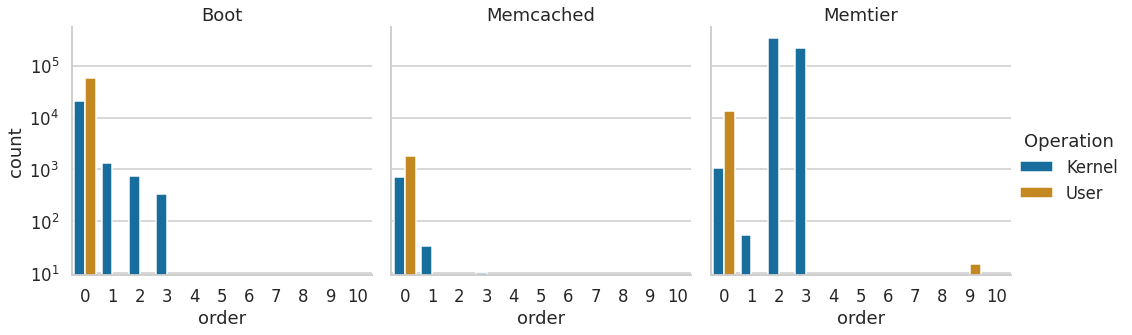

In [27]:
# Allocation / Free Counts for memtier 180s
p = benches[2]
b0 = p[0].copy()
b0["p"] = "Boot"
b1 = diff(p[0], p[1])
b1["p"] = "Memcached"
b2 = diff(p[1], p[2])
b2["p"] = "Memtier"

df = pd.concat([b0, b1, b2])
df["count"] += df["bulk"]

plt = sns.catplot(data=df, kind="bar", x="order", y="count", hue="op", col="p")
plt.set(yscale="log")
plt.set_titles("{col_name}")
plt.legend.set_title("Operation")


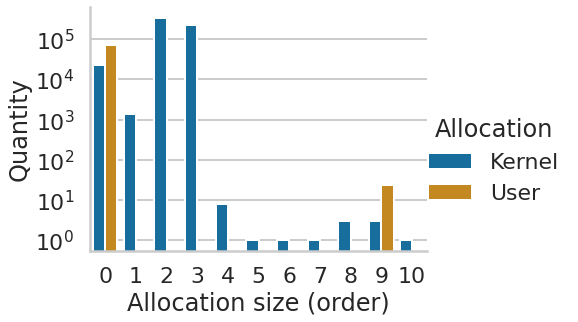

In [21]:
with sns.plotting_context("poster"):
    p = benches[2][2].copy()
    p["count"] += p["bulk"]
    del p["bulk"]
    plt = sns.catplot(data=p, kind="bar", x="order", y="count", hue="op", aspect=1.5)
    plt.set(yscale="log")
    plt.legend.set_title("Allocation")
    plt.set(xlabel="Allocation size (order)")
    plt.set(ylabel="Quantity")
    plt.savefig("out/size_counters.pdf", bbox_inches='tight')

save_dref("size_counters", ["order", "op"], p)


# Runtime Tests...

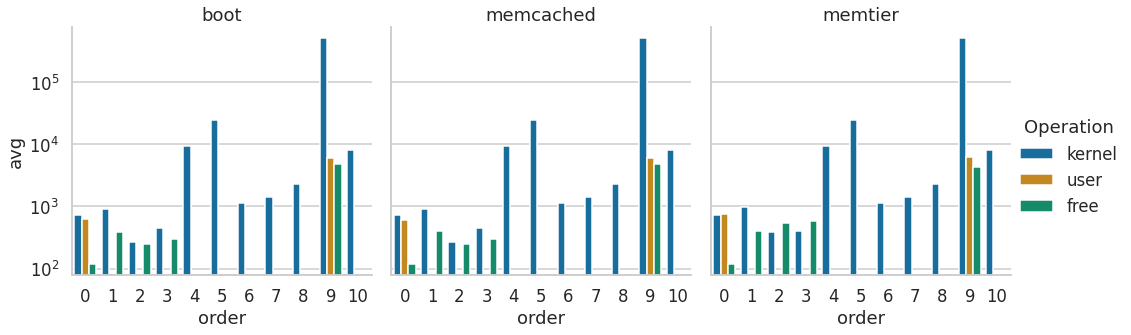

In [ ]:
# Allocation / Free average times for memtier 60s
p = benches[0]
b0 = p[0].copy()
b0["p"] = "boot"
b1 = p[1]
b1["p"] = "memcached"
b2 = p[2]
b2["p"] = "memtier"

df = pd.concat([b0, b1, b2])

plt = sns.catplot(data=df, kind="bar", x="order", y="avg", hue="op", col="p")
plt.set(yscale="log")
plt.set_titles("{col_name}")
plt.legend.set_title("Operation")


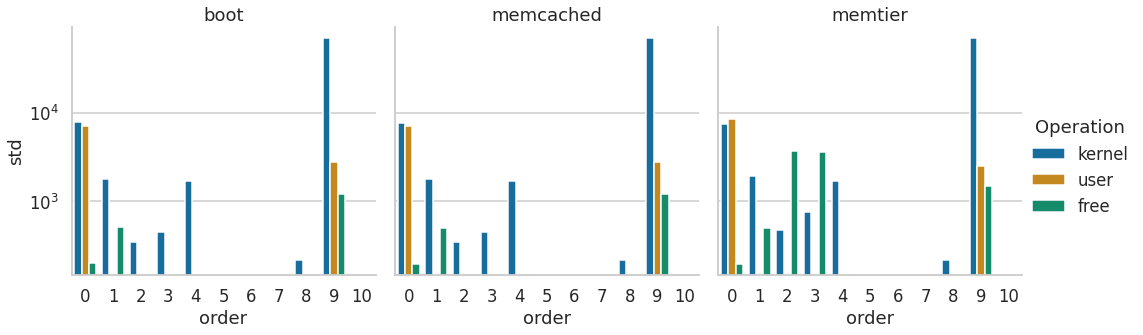

In [ ]:
# Allocation / Free time std for memtier 60s
p = benches[0]
b0 = p[0].copy()
b0["p"] = "boot"
b1 = p[1]
b1["p"] = "memcached"
b2 = p[2]
b2["p"] = "memtier"

df = pd.concat([b0, b1, b2])

plt = sns.catplot(data=df, kind="bar", x="order", y="std", hue="op", col="p")
plt.set(yscale="log")
plt.set_titles("{col_name}")
plt.legend.set_title("Operation")
